In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('female(imputed).csv')
df

,gender,match,samerace,age_o,field_cd,like_o,shar_o,sinc_o,race_o,intel_o,attr_o,amb_o,fun_o,age,race,imprace,imprelig,exphappy,career_c,dec_o
0,0,0,0,27,1,7.000000,6.00000,8.000000,2,8.000000,6.000000,8.00000,8.000000,21,4,2,4,3,5.571248,0
1,0,0,0,22,1,8.000000,5.00000,8.000000,2,10.000000,7.000000,7.00000,7.000000,21,4,2,4,3,5.571248,0
2,0,1,1,22,1,10.000000,10.00000,10.000000,4,10.000000,10.000000,10.00000,10.000000,21,4,2,4,3,5.571248,1
3,0,1,0,23,1,7.000000,8.00000,8.000000,2,9.000000,7.000000,9.00000,8.000000,21,4,2,4,3,5.571248,1
4,0,1,0,24,1,8.000000,7.00000,7.000000,3,9.000000,8.000000,9.00000,6.000000,21,4,2,4,3,5.571248,1
5,0,0,0,25,1,7.000000,7.00000,7.000000,2,8.000000,7.000000,7.00000,8.000000,21,4,2,4,3,5.571248,1
6,0,0,0,30,1,2.000000,7.00000,6.000000,2,7.000000,3.000000,8.00000,5.000000,21,4,2,4,3,5.571248,0
7,0,0,0,27,1,7.000000,6.00000,7.000000,2,5.000000,6.000000,8.00000,6.000000,21,4,2,4,3,5.571248,0
8,0,1,0,28,1,6.500000,9.00000,7.000000,2,8.000000,7.000000,8.00000,8.000000,21,4,2,4,3,5.571248,1
9,0,0,0,24,1,6.000000,6.00000,6.000000,2,6.000000,6.000000,6.00000,6.000000,21,4,2,4,3,5.571248,0


In [3]:
df2 = df[['sinc_o', 'like_o', 'shar_o', 'race_o', 'intel_o', 'attr_o', 'amb_o', 'fun_o', 'dec_o']]
df2

,sinc_o,like_o,shar_o,race_o,intel_o,attr_o,amb_o,fun_o,dec_o
0,8.000000,7.000000,6.00000,2,8.000000,6.000000,8.00000,8.000000,0
1,8.000000,8.000000,5.00000,2,10.000000,7.000000,7.00000,7.000000,0
2,10.000000,10.000000,10.00000,4,10.000000,10.000000,10.00000,10.000000,1
3,8.000000,7.000000,8.00000,2,9.000000,7.000000,9.00000,8.000000,1
4,7.000000,8.000000,7.00000,3,9.000000,8.000000,9.00000,6.000000,1
5,7.000000,7.000000,7.00000,2,8.000000,7.000000,7.00000,8.000000,1
6,6.000000,2.000000,7.00000,2,7.000000,3.000000,8.00000,5.000000,0
7,7.000000,7.000000,6.00000,2,5.000000,6.000000,8.00000,6.000000,0
8,7.000000,6.500000,9.00000,2,8.000000,7.000000,8.00000,8.000000,1
9,6.000000,6.000000,6.00000,2,6.000000,6.000000,6.00000,6.000000,0


In [4]:
import seaborn as sns

sns.heatmap(df2.corr())

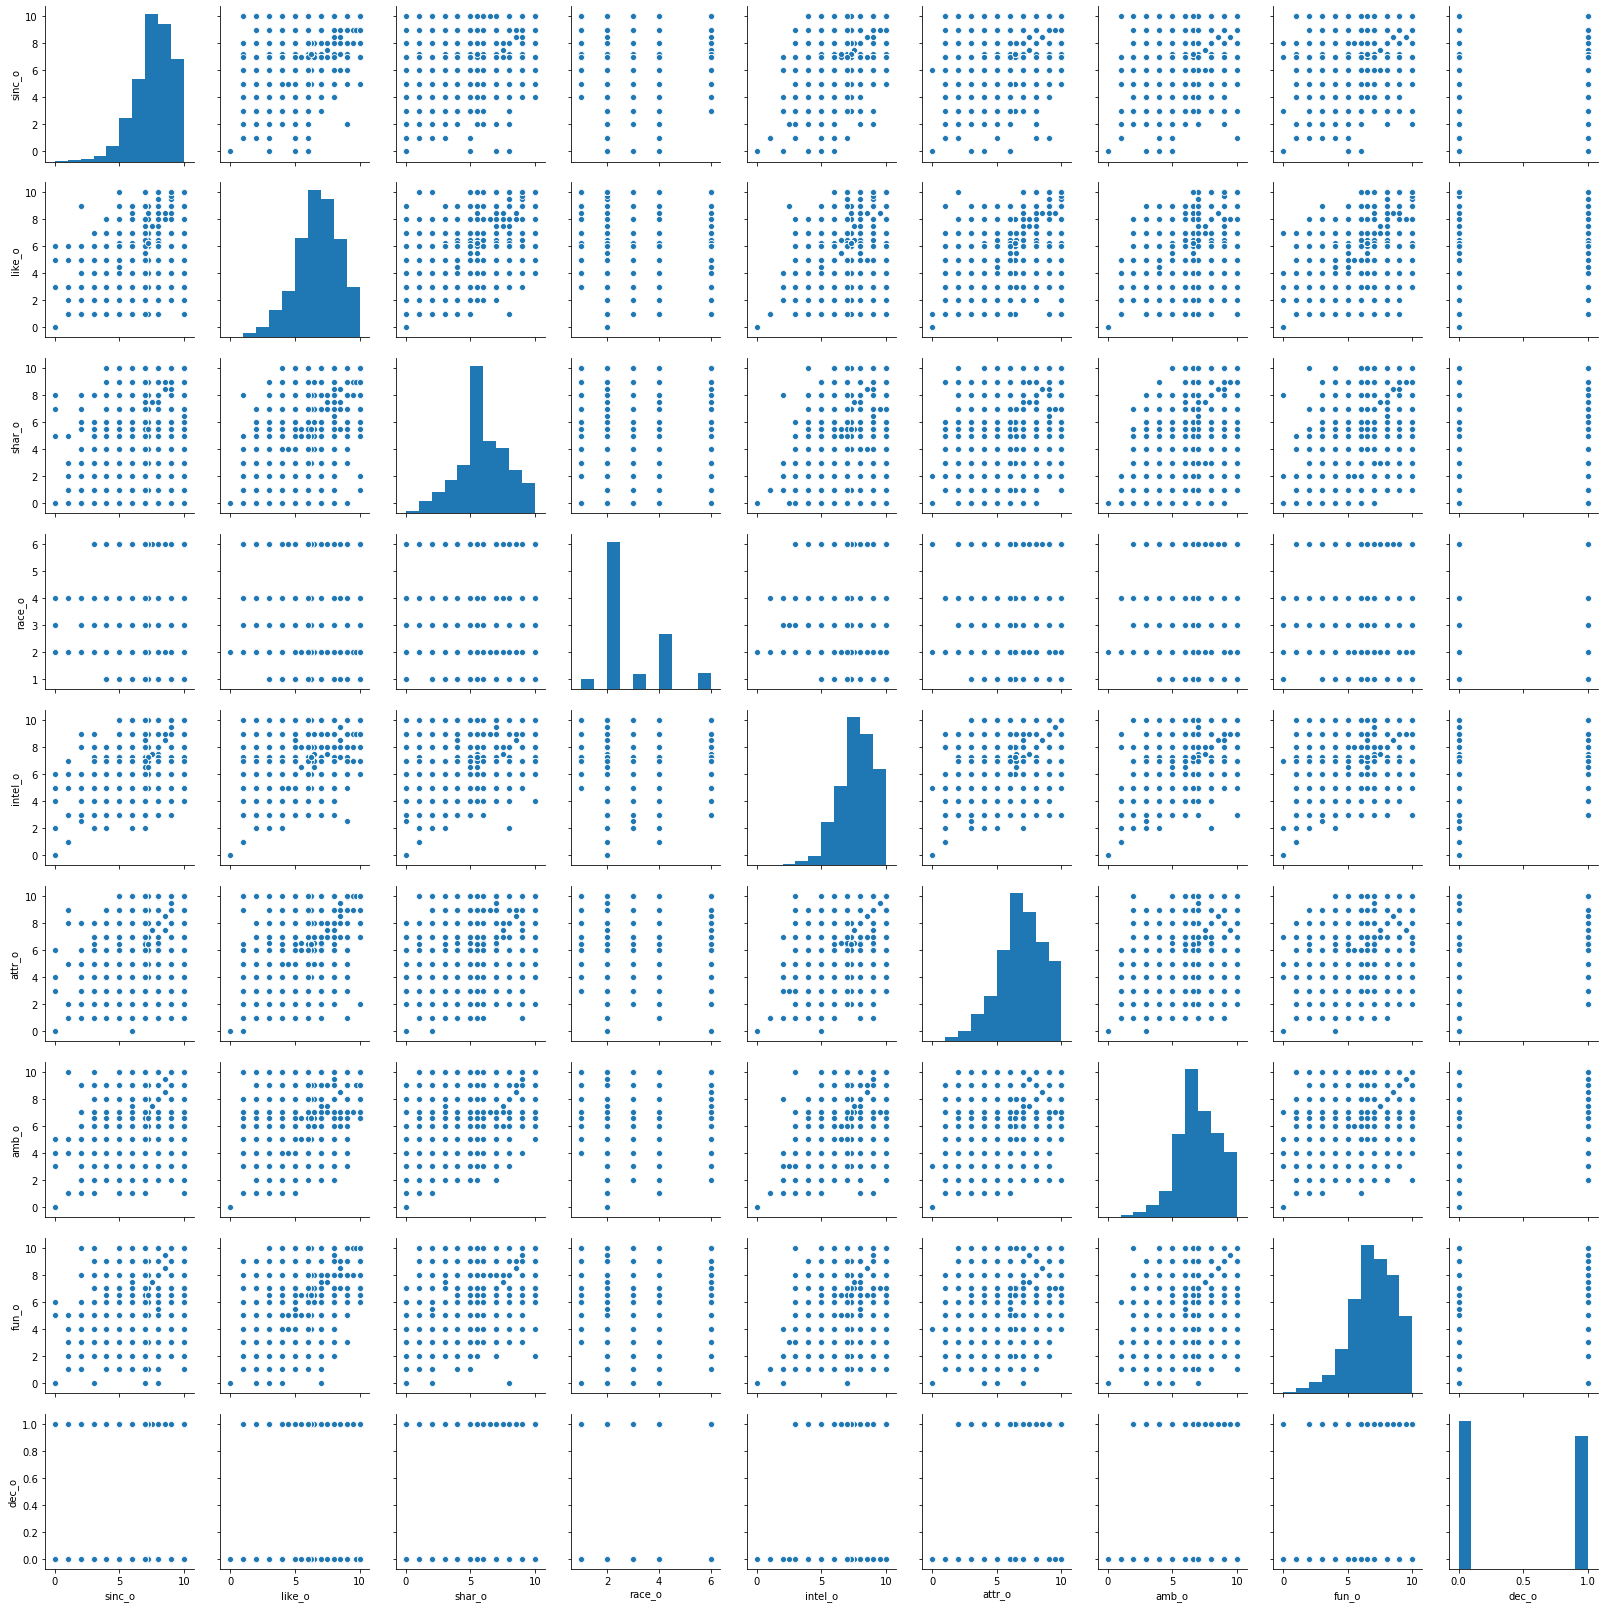

In [5]:
sns.pairplot(data=df2)

In [6]:
del df2['race_o']
df2

,sinc_o,like_o,shar_o,intel_o,attr_o,amb_o,fun_o,dec_o
0,8.000000,7.000000,6.00000,8.000000,6.000000,8.00000,8.000000,0
1,8.000000,8.000000,5.00000,10.000000,7.000000,7.00000,7.000000,0
2,10.000000,10.000000,10.00000,10.000000,10.000000,10.00000,10.000000,1
3,8.000000,7.000000,8.00000,9.000000,7.000000,9.00000,8.000000,1
4,7.000000,8.000000,7.00000,9.000000,8.000000,9.00000,6.000000,1
5,7.000000,7.000000,7.00000,8.000000,7.000000,7.00000,8.000000,1
6,6.000000,2.000000,7.00000,7.000000,3.000000,8.00000,5.000000,0
7,7.000000,7.000000,6.00000,5.000000,6.000000,8.00000,6.000000,0
8,7.000000,6.500000,9.00000,8.000000,7.000000,8.00000,8.000000,1
9,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,0


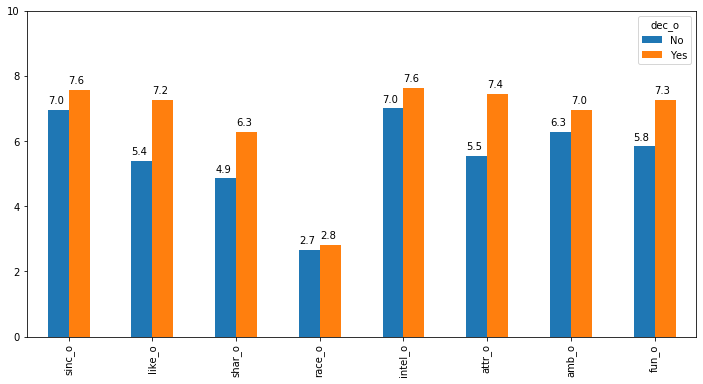

In [7]:
tmp = df[['sinc_o', 'like_o', 'shar_o', 'race_o', 'intel_o', 'attr_o', 'amb_o', 'fun_o', 'dec_o']].groupby('dec_o').mean().stack().unstack(0)
tmp = tmp.rename(columns={0: 'No', 1: 'Yes'})
ax = tmp.plot(kind='bar', figsize=(12,6), ylim=(0,10))       
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+0.2,\
           str(round((i.get_height()), 1)))